In this notebook you can see how I trained a model to be able to solve a captcha. There are two models I have trained(this notebook only shows you the training of one of them, the other model was trained the same way with same change in hyperparameters):
 

*   **captcha_model_22.h5**: 1st output accuracy:0.8462, 2nd:0.7981, 3rd:0.6731, 4th:0.6346, 5th:0.6538, total accuracy:0.22
*   **captcha_model_27.h5**: 1st output accuracy:0.8900, 2nd:0.8235, 3rd:0.6923,4th:0.7338, 5th: 0.6662, total accuracy:0.27

for example 1st output accuracy is the accuracy only for the first letter of the captcha, if it is 0.80, it means that 80% of the predictions for the first letter were right.

total accuracy: for example if we have 20% total accuracy, it means that on average 1 out of 5 captchas are predicted completely correctly. that's why it is way less than the rest because only if one of the five letter are wrong the whole captcha prediction is considered wrong.

**!** Please be informed that these numbers are calculated on the data that the model has **NOT** seen before(10 percent of the data was kept as test set).

## Unzip the data

In [ ]:
!unzip -qq samples.zip #unzip the data

## Preprocessing the data to extract images and labels

In [ ]:
# necessary imports
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder

batch_size = 16
img_width = 200
img_height = 50

data_dir = Path("/content")
ds = sorted(list(map(str, list(data_dir.glob("*.png")))))

In [ ]:
ds

['/content/226md.png',
 '/content/22d5n.png',
 '/content/2356g.png',
 '/content/23mdg.png',
 '/content/23n88.png',
 '/content/243mm.png',
 '/content/244e2.png',
 '/content/245y5.png',
 '/content/24f6w.png',
 '/content/24pew.png',
 '/content/25257.png',
 '/content/253dc.png',
 '/content/25egp.png',
 '/content/25m6p.png',
 '/content/25p2m.png',
 '/content/25w53.png',
 '/content/264m5.png',
 '/content/268g2.png',
 '/content/28348.png',
 '/content/28x47.png',
 '/content/2b827.png',
 '/content/2bg48.png',
 '/content/2cegf.png',
 '/content/2cg58.png',
 '/content/2cgyx.png',
 '/content/2en7g.png',
 '/content/2enf4.png',
 '/content/2fxgd.png',
 '/content/2g783.png',
 '/content/2g7nm.png',
 '/content/2gyb6.png',
 '/content/2mg87.png',
 '/content/2mpnn.png',
 '/content/2n73f.png',
 '/content/2nbcx.png',
 '/content/2nf26.png',
 '/content/2npg6.png',
 '/content/2nx38.png',
 '/content/2p2y8.png',
 '/content/2pfpn.png',
 '/content/2w4y7.png',
 '/content/2wc38.png',
 '/content/2wx73.png',
 '/content/

In [ ]:
def preprocess_1(ds):
  new_ds = []
  for file_path in ds:
    # read the image
    image = tf.io.read_file(file_path)
    # decode the imahge to an array
    image = tf.image.decode_png(image, channels = 1)
    # convert the numbers in the images to float32
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize to the desired size
    image = tf.image.resize(image, [img_height, img_width])
    # Transpose the image because when I tryed to plot
    # the images the are vertical instead of horizontal
    image = tf.transpose(image, perm=[1, 0, 2])
    label = file_path.split('/')[2].split('.')[0]
    new_ds.append([image, label])
  return new_ds 

new_ds = preprocess_1(ds)
new_ds[0]

[<tf.Tensor: shape=(200, 50, 1), dtype=float32, numpy=
 array([[[0.75294125],
         [0.75294125],
         [0.75294125],
         ...,
         [0.76470596],
         [0.76470596],
         [0.76470596]],
 
        [[0.75294125],
         [0.75294125],
         [0.75294125],
         ...,
         [0.76470596],
         [0.76470596],
         [0.76470596]],
 
        [[0.75294125],
         [0.75294125],
         [0.75294125],
         ...,
         [0.76470596],
         [0.76470596],
         [0.76470596]],
 
        ...,
 
        [[0.9843138 ],
         [0.9843138 ],
         [0.9843138 ],
         ...,
         [0.9960785 ],
         [0.9960785 ],
         [0.9960785 ]],
 
        [[0.9843138 ],
         [0.9843138 ],
         [0.9843138 ],
         ...,
         [0.9960785 ],
         [0.9960785 ],
         [0.9960785 ]],
 
        [[0.9843138 ],
         [0.9843138 ],
         [0.9843138 ],
         ...,
         [0.9960785 ],
         [0.9960785 ],
         [0.9960785 ]]], d

In [ ]:
# get all the labels in a list
labels = []
for item in new_ds:
  labels.append(item[1])
labels

['226md',
 '22d5n',
 '2356g',
 '23mdg',
 '23n88',
 '243mm',
 '244e2',
 '245y5',
 '24f6w',
 '24pew',
 '25257',
 '253dc',
 '25egp',
 '25m6p',
 '25p2m',
 '25w53',
 '264m5',
 '268g2',
 '28348',
 '28x47',
 '2b827',
 '2bg48',
 '2cegf',
 '2cg58',
 '2cgyx',
 '2en7g',
 '2enf4',
 '2fxgd',
 '2g783',
 '2g7nm',
 '2gyb6',
 '2mg87',
 '2mpnn',
 '2n73f',
 '2nbcx',
 '2nf26',
 '2npg6',
 '2nx38',
 '2p2y8',
 '2pfpn',
 '2w4y7',
 '2wc38',
 '2wx73',
 '2x7bm',
 '2xc2n',
 '2ycn8',
 '2yggg',
 '325fb',
 '32cnn',
 '32dnn',
 '33b22',
 '33f7m',
 '33n73',
 '33ng4',
 '33p4e',
 '34b84',
 '34fxm',
 '34pcn',
 '368y5',
 '36bc2',
 '36nx4',
 '36w25',
 '373gb',
 '377xx',
 '378e5',
 '37d52',
 '37ep6',
 '387g2',
 '38n57',
 '3b4we',
 '3bd8f',
 '3bfnd',
 '3bnyf',
 '3bx86',
 '3cpwb',
 '3d7bd',
 '3den6',
 '3dgmf',
 '3ebnn',
 '3ebpw',
 '3eny7',
 '3fbxd',
 '3g2w6',
 '3mxdn',
 '3n2b4',
 '3n3cf',
 '3n7mx',
 '3ndxd',
 '3nfdn',
 '3nnpw',
 '3nw7w',
 '3ny45',
 '3p4nn',
 '3p67n',
 '3pe4g',
 '3w2bw',
 '3wnd3',
 '3x325',
 '3x5fm',
 '3xcgg',


In [ ]:
# let's check how many characters we have in our captchas
characters = set(char for label in labels for char in label)
characters = sorted(list(characters))
characters

['2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y']

In [ ]:
# train a one hot encoder
characters_2D = []
characters = set(char for label in labels for char in label)
characters = sorted(list(characters))
for character in characters:
  characters_2D.append([character])

enc = OneHotEncoder(handle_unknown='ignore')
onehot_labels = enc.fit_transform(characters_2D).toarray()
print(onehot_labels)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
# one-hot-encode your labels
def preprocess_2(new_ds):
  final_ds = []
  label = []
  for item in new_ds:
    for character in item[1]:
      label.append([character])
    label = enc.transform(label).toarray()
    label_1 = label[0]
    label_2 = label[1]
    label_3 = label[2]
    label_4 = label[3]
    label_5 = label[4]
    final_ds.append([item[0], label_1, label_2, label_3, label_4, label_5])
    label = []
  return final_ds
random.seed(1)
random.shuffle(new_ds)
final_df = preprocess_2(new_ds)
final_df[0]

[<tf.Tensor: shape=(200, 50, 1), dtype=float32, numpy=
 array([[[0.75294125],
         [0.75294125],
         [0.75294125],
         ...,
         [0.76470596],
         [0.76470596],
         [0.76470596]],
 
        [[0.75294125],
         [0.75294125],
         [0.75294125],
         ...,
         [0.76470596],
         [0.76470596],
         [0.76470596]],
 
        [[0.75294125],
         [0.75294125],
         [0.75294125],
         ...,
         [0.76470596],
         [0.76470596],
         [0.76470596]],
 
        ...,
 
        [[0.9843138 ],
         [0.9843138 ],
         [0.9843138 ],
         ...,
         [0.9960785 ],
         [0.9960785 ],
         [0.9960785 ]],
 
        [[0.9843138 ],
         [0.9843138 ],
         [0.9843138 ],
         ...,
         [0.9960785 ],
         [0.9960785 ],
         [0.9960785 ]],
 
        [[0.9843138 ],
         [0.9843138 ],
         [0.9843138 ],
         ...,
         [0.9960785 ],
         [0.9960785 ],
         [0.9960785 ]]], d

In [ ]:
print(len(final_df),'******',len(final_df[0]))

1040 ****** 6


## Split the data to train and test sets

In [ ]:
X = []
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]

for item in final_df:
  X.append(item[0])
  y1.append(item[1])
  y2.append(item[2])
  y3.append(item[3])
  y4.append(item[4])
  y5.append(item[5])

X = np.array(X)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
y4 = np.array(y4)
y5 = np.array(y5)



In [ ]:
print(X[0], X[0].shape)

[[[0.75294125]
  [0.75294125]
  [0.75294125]
  ...
  [0.76470596]
  [0.76470596]
  [0.76470596]]

 [[0.75294125]
  [0.75294125]
  [0.75294125]
  ...
  [0.76470596]
  [0.76470596]
  [0.76470596]]

 [[0.75294125]
  [0.75294125]
  [0.75294125]
  ...
  [0.76470596]
  [0.76470596]
  [0.76470596]]

 ...

 [[0.9843138 ]
  [0.9843138 ]
  [0.9843138 ]
  ...
  [0.9960785 ]
  [0.9960785 ]
  [0.9960785 ]]

 [[0.9843138 ]
  [0.9843138 ]
  [0.9843138 ]
  ...
  [0.9960785 ]
  [0.9960785 ]
  [0.9960785 ]]

 [[0.9843138 ]
  [0.9843138 ]
  [0.9843138 ]
  ...
  [0.9960785 ]
  [0.9960785 ]
  [0.9960785 ]]] (200, 50, 1)


In [ ]:
print(y1[0],y2[0],y3[0],y4[0],y5[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# data is already shuffled...
def split_data(X, y1, y2, y3, y4, y5, train_size=0.9):
  size = len(X)
  indices = np.arange(size)
  train_samples = int(size * train_size)
  X_train = X[indices[:train_samples]]
  y1_train = y1[indices[:train_samples]]
  y2_train = y2[indices[:train_samples]]
  y3_train = y3[indices[:train_samples]]
  y4_train = y4[indices[:train_samples]]
  y5_train = y5[indices[:train_samples]]

  X_test = X[indices[train_samples:]]
  y1_test = y1[indices[train_samples:]]
  y2_test = y2[indices[train_samples:]]
  y3_test = y3[indices[train_samples:]]
  y4_test = y4[indices[train_samples:]]
  y5_test = y5[indices[train_samples:]]  

  return X_train, y1_train, y2_train, y3_train, y4_train, y5_train, X_test, y1_test, y2_test, y3_test, y4_test, y5_test                          

X_train, y1_train, y2_train, y3_train, y4_train, y5_train, X_test, y1_test, y2_test, y3_test, y4_test, y5_test = split_data(X,y1,y2,y3,y4,y5)

  


In [ ]:
len(X_train), X_train.shape

(936, (936, 200, 50, 1))

## Let's check out some of the data!

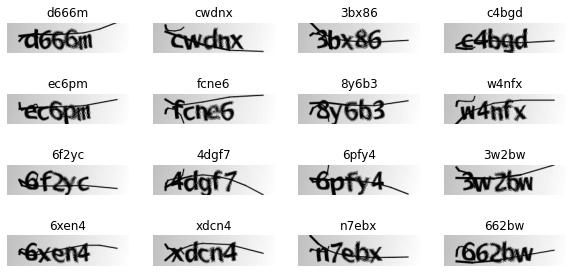

In [ ]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
for i,item in enumerate(final_df[:16]):
    image = item[0]
    label1 = enc.inverse_transform([list(item[1])])
    label2 = enc.inverse_transform([list(item[2])])
    label3 = enc.inverse_transform([list(item[3])])
    label4 = enc.inverse_transform([list(item[4])])
    label5 = enc.inverse_transform([list(item[5])])
    helper_list = [label1[0][0],label2[0][0],label3[0][0],label4[0][0],label5[0][0]]
    label = "".join(helper_list)
    helper_list = []
    image = (image * 255).numpy().astype("uint8") 
    ax[i // 4, i % 4].imshow(image[:, :, 0].T, cmap="gray")
    ax[i // 4, i % 4].set_title(label)
    ax[i // 4, i % 4].axis("off")
plt.show()

## Building and training a model

In [ ]:
def build_model():
  input = layers.Input(shape=(img_width, img_height, 1), name="input", dtype="float32") # or img_width, img_height
  x = layers.Conv2D(32, (5, 5), activation="relu", padding="same", name="Conv1")(input)
  x = layers.MaxPooling2D((2, 2), name="pool1")(x)
  x = layers.Conv2D(48, (5, 5), activation="relu", padding="same", name="Conv2")(x)
  x = layers.MaxPooling2D((2, 2), name="pool2")(x)
  x = layers.Conv2D(64, (5, 5), activation="relu", padding="same", name="Conv3")(x)
  x = layers.MaxPooling2D((2, 2), name="pool3")(x)
  x = layers.Flatten()(x)
  x = layers.Dense(128, activation="relu", name="dense1")(x)
  out_1 = keras.layers.Dense(19, activation='softmax', name='output_1')(x)
  out_2 = keras.layers.Dense(19, activation='softmax', name='output_2')(x)
  out_3 = keras.layers.Dense(19, activation='softmax', name='output_3')(x)
  out_4 = keras.layers.Dense(19, activation='softmax', name='output_4')(x)
  out_5 = keras.layers.Dense(19, activation='softmax', name='output_5')(x)
  model = keras.models.Model( inputs = input, outputs = [out_1, out_2, out_3,out_4,out_5], name="model")
  opt = keras.optimizers.Adam()
  model.compile(optimizer=opt,
                loss={"output_1" : "categorical_crossentropy", 
                    "output_2":"categorical_crossentropy", 
                    "output_3":"categorical_crossentropy",
                    "output_4":"categorical_crossentropy",
                    "output_5":"categorical_crossentropy"},
                  metrics = {"output_1": "accuracy",
                    "output_2": "accuracy",
                    "output_3": 'accuracy',
                    "output_4": 'accuracy',
                    "output_5":'accuracy'})
  return model

model = build_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 200, 50, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 200, 50, 32)  832         ['input[0][0]']                  
                                                                                                  
 pool1 (MaxPooling2D)           (None, 100, 25, 32)  0           ['Conv1[0][0]']                  
                                                                                                  
 Conv2 (Conv2D)                 (None, 100, 25, 48)  38448       ['pool1[0][0]']              

In [ ]:
# Train the model
history = model.fit(X_train,
                    {'output_1':y1_train, 'output_2':y2_train, 'output_3':y3_train, 'output_4':y4_train ,'output_5':y5_train},
                    validation_data=(X_test,{'output_1':y1_test, 'output_2':y2_test, 'output_3':y3_test, 'output_4':y4_test,'output_5':y5_test}),
                    epochs= 12)

Epoch 1/12
30/30 [==============================] - 23s 712ms/step - loss: 14.6868 - output_1_loss: 2.9486 - output_2_loss: 2.9390 - output_3_loss: 2.9384 - output_4_loss: 2.9339 - output_5_loss: 2.9269 - output_1_accuracy: 0.0705 - output_2_accuracy: 0.0908 - output_3_accuracy: 0.0908 - output_4_accuracy: 0.0994 - output_5_accuracy: 0.1090 - val_loss: 14.6347 - val_output_1_loss: 2.9213 - val_output_2_loss: 2.9228 - val_output_3_loss: 2.9233 - val_output_4_loss: 2.9187 - val_output_5_loss: 2.9487 - val_output_1_accuracy: 0.0769 - val_output_2_accuracy: 0.1058 - val_output_3_accuracy: 0.1250 - val_output_4_accuracy: 0.0673 - val_output_5_accuracy: 0.0865
Epoch 2/12
30/30 [==============================] - 20s 670ms/step - loss: 14.3326 - output_1_loss: 2.8260 - output_2_loss: 2.8696 - output_3_loss: 2.8871 - output_4_loss: 2.8943 - output_5_loss: 2.8556 - output_1_accuracy: 0.1303 - output_2_accuracy: 0.1026 - output_3_accuracy: 0.1047 - output_4_accuracy: 0.1058 - output_5_accuracy: 0

### Save the model(execute once)

In [ ]:
# model.save("/content/sample_data/captcha_model.h5")

## Let's see how our model predicts!

In [ ]:
y_pred1,y_pred2,y_pred3,y_pred4,y_pred5 = model.predict(X_test)

In [ ]:
print(np.argmax(y_pred1[1], axis = 0),
      np.argmax(y_pred2[1], axis = 0),
      np.argmax(y_pred3[1], axis = 0),
      np.argmax(y_pred4[1], axis = 0),
      np.argmax(y_pred5[1], axis = 0))


3 7 17 11 11


As you can see we have to decode these numbers. we can't understand the predictions this way

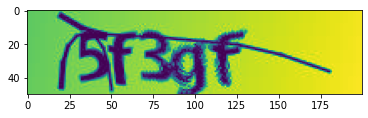

In [ ]:
plt.imshow(X_test[1].reshape((200, 50)).transpose())

## Decode the output and calculate the total accuracy of your model

In [ ]:
############################### Total Accuracy ################################
# for example if we have 20% total accuracy, it means that on average 1 out of 5 captchas are predicted correctly.
def decode(y):
  if(y == 0):
    return '2'
  elif(y == 1):
    return '3'
  elif(y == 2):
    return '4'
  elif(y == 3):
    return '5'
  elif(y == 4):
    return '6'
  elif(y == 5):
    return '7'
  elif(y == 6):
    return '8'
  elif(y == 7):
    return 'b'
  elif(y == 8):
    return 'c'
  elif(y == 9):
    return 'd'
  elif(y == 10):
    return 'e'
  elif(y == 11):
    return 'f'
  elif(y == 12):
    return 'g'
  elif(y == 13):
    return 'm'
  elif(y == 14):
    return 'n'
  elif(y == 15):
    return 'p'
  elif(y == 16):
    return 'w'
  elif(y == 17):
    return 'x'
  else:
    return 'y'
     
def predict(x):
  # print('prediction:')
  # plt.imshow(x.reshape((200, 50)).transpose())
  y1p,y2p,y3p,y4p,y5p = model.predict(x) #y1p is for y1 probability because the predict method returns probabilities.
  # turning probabilities to classes
  y1 =np.argmax(y1p[0], axis = 0)
  y2 =np.argmax(y2p[0], axis = 0)
  y3 =np.argmax(y3p[0], axis = 0)
  y4 =np.argmax(y4p[0], axis = 0)
  y5 =np.argmax(y5p[0], axis = 0)
  
  y1 = decode(y1)
  y2 = decode(y2)
  y3 = decode(y3)
  y4 = decode(y4)
  y5 = decode(y5)
  helper_list = [y1,y2,y3,y4,y5]
  output =''.join(helper_list)
  # print(output)
  helper_list = []
  return output

predictions = []
y_test_str = []
for x in X_test:
  predictions.append(predict(np.array([x])))

for i,x in enumerate(X_test):
  y1 =np.argmax(y1_test[i], axis = 0)
  y2 =np.argmax(y2_test[i], axis = 0)
  y3 =np.argmax(y3_test[i], axis = 0)
  y4 =np.argmax(y4_test[i], axis = 0)
  y5 =np.argmax(y5_test[i], axis = 0)

  y1 = decode(y1)
  y2 = decode(y2)
  y3 = decode(y3)
  y4 = decode(y4)
  y5 = decode(y5)
  helper1 = [y1,y2,y3,y4,y5]
  y_test_str_single =''.join(helper1)
  helper1 = []
  y_test_str.append(y_test_str_single)

counter = 0
for i,x in enumerate(X_test):
  if(predictions[i] == y_test_str[i]):
    counter += 1 

total_accuracy = counter/len(X_test)*100
total_accuracy

22.115384615384613

prediction:
w8g4d


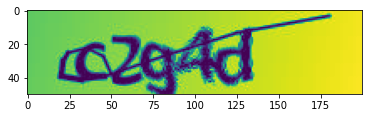

In [ ]:
def decode(y):
  if(y == 0):
    return '2'
  elif(y == 1):
    return '3'
  elif(y == 2):
    return '4'
  elif(y == 3):
    return '5'
  elif(y == 4):
    return '6'
  elif(y == 5):
    return '7'
  elif(y == 6):
    return '8'
  elif(y == 7):
    return 'b'
  elif(y == 8):
    return 'c'
  elif(y == 9):
    return 'd'
  elif(y == 10):
    return 'e'
  elif(y == 11):
    return 'f'
  elif(y == 12):
    return 'g'
  elif(y == 13):
    return 'm'
  elif(y == 14):
    return 'n'
  elif(y == 15):
    return 'p'
  elif(y == 16):
    return 'w'
  elif(y == 17):
    return 'x'
  else:
    return 'y'
      


def predict(x):
  print('prediction:')
  plt.imshow(x.reshape((200, 50)).transpose())
  y1p,y2p,y3p,y4p,y5p = model.predict(x) #y1p is for y1 probability because the predict method returns probabilities.
  # turning probabilities to classes
  y1 =np.argmax(y1p[0], axis = 0)
  y2 =np.argmax(y2p[0], axis = 0)
  y3 =np.argmax(y3p[0], axis = 0)
  y4 =np.argmax(y4p[0], axis = 0)
  y5 =np.argmax(y5p[0], axis = 0)
  
  y1 = decode(y1)
  y2 = decode(y2)
  y3 = decode(y3)
  y4 = decode(y4)
  y5 = decode(y5)
  helper_list = [y1,y2,y3,y4,y5]
  output =''.join(helper_list)
  print(output)
  helper_list = []
  return output

z = predict(np.array([X_test[3]]))

## Altogether!

the cell below loads our previously trained model and through the talk_to_user() function keeps asking for a captcha image address to predict! you can exit by pressing q.

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('./captcha_model_22.h5')

# c2g4d   n5w5g   b2g8e   5f3gf   deneb   gxx2p   bpwd7   nn4wx   6g45w    pg2yx: these are from the test set!

def decode(y):
  if(y == 0):
    return '2'
  elif(y == 1):
    return '3'
  elif(y == 2):
    return '4'
  elif(y == 3):
    return '5'
  elif(y == 4):
    return '6'
  elif(y == 5):
    return '7'
  elif(y == 6):
    return '8'
  elif(y == 7):
    return 'b'
  elif(y == 8):
    return 'c'
  elif(y == 9):
    return 'd'
  elif(y == 10):
    return 'e'
  elif(y == 11):
    return 'f'
  elif(y == 12):
    return 'g'
  elif(y == 13):
    return 'm'
  elif(y == 14):
    return 'n'
  elif(y == 15):
    return 'p'
  elif(y == 16):
    return 'w'
  elif(y == 17):
    return 'x'
  else:
    return 'y'
      

def predict_captcha(img):
  plt.imshow(img)
  plt.show()
  x = img[:, :, 0]
  x = x.transpose()
  x = np.array([x])
  y1p,y2p,y3p,y4p,y5p = model.predict(x) #y1p is for y1 probability because the predict method returns probabilities.
  # turning probabilities to classes
  y1 =np.argmax(y1p[0], axis = 0)
  y2 =np.argmax(y2p[0], axis = 0)
  y3 =np.argmax(y3p[0], axis = 0)
  y4 =np.argmax(y4p[0], axis = 0)
  y5 =np.argmax(y5p[0], axis = 0)
  
  y1 = decode(y1)
  y2 = decode(y2)
  y3 = decode(y3)
  y4 = decode(y4)
  y5 = decode(y5)
  helper_list = [y1,y2,y3,y4,y5]
  output =''.join(helper_list)
  # print(output)
  helper_list = []
  return output

def talk_with_user():
  while(1):
    path = input('Please enter the filepath of your captcha image(to exit press q): ')
    try:
      if(path != 'q'):
        img = plt.imread(path)
        prediction = predict_captcha(img)
        print('The prediction is: ',prediction)
      else:
        print('bye bye!')
        break
    except:
        print('Something went wrong')
        break

talk_with_user()


please enter the filepath of your captcha image(to exit press q): q
bye bye!


## Independant python cell

The cell below can be run independently and it will be changed a bit (I'll make it object_oriented) and used in my .py file for the project that can be run by just a single command. you have to copy the captcha_model_22.h5 to the same directory your .py file exists.

please enter the filepath of your captcha image(to exit press q): /content/c2g4d.png


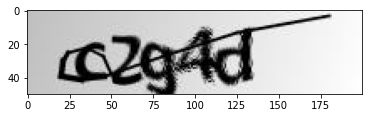

the prediction is:  w8g4d
please enter the filepath of your captcha image(to exit press q): /content/n5w5g.png


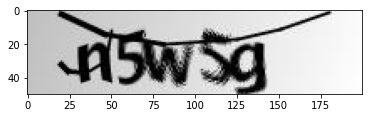

the prediction is:  n5w5g
please enter the filepath of your captcha image(to exit press q): /content/33b22.png


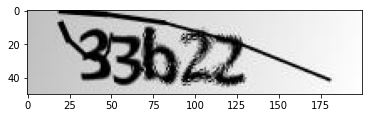

the prediction is:  33b22
please enter the filepath of your captcha image(to exit press q): q
bye bye!


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder

model = load_model('./captcha_model_22.h5')

# c2g4d   n5w5g   b2g8e   5f3gf   deneb   gxx2p   bpwd7   nn4wx   6g45w    pg2yx: these are from the test set!

def decode(y):
  # this function turns a class number to its corresponding string
  if(y == 0):
    return '2'
  elif(y == 1):
    return '3'
  elif(y == 2):
    return '4'
  elif(y == 3):
    return '5'
  elif(y == 4):
    return '6'
  elif(y == 5):
    return '7'
  elif(y == 6):
    return '8'
  elif(y == 7):
    return 'b'
  elif(y == 8):
    return 'c'
  elif(y == 9):
    return 'd'
  elif(y == 10):
    return 'e'
  elif(y == 11):
    return 'f'
  elif(y == 12):
    return 'g'
  elif(y == 13):
    return 'm'
  elif(y == 14):
    return 'n'
  elif(y == 15):
    return 'p'
  elif(y == 16):
    return 'w'
  elif(y == 17):
    return 'x'
  else:
    return 'y'
      

def predict_captcha(img):
  plt.imshow(img)
  plt.show()
  x = img[:, :, 0]
  x = x.transpose()
  x = np.array([x])
  y1p,y2p,y3p,y4p,y5p = model.predict(x) #y1p is for y1 probability because the predict method returns probabilities.
  # turning probabilities to class numbers
  y1 =np.argmax(y1p[0], axis = 0)
  y2 =np.argmax(y2p[0], axis = 0)
  y3 =np.argmax(y3p[0], axis = 0)
  y4 =np.argmax(y4p[0], axis = 0)
  y5 =np.argmax(y5p[0], axis = 0)
  
  y1 = decode(y1)
  y2 = decode(y2)
  y3 = decode(y3)
  y4 = decode(y4)
  y5 = decode(y5)
  helper_list = [y1,y2,y3,y4,y5]
  output =''.join(helper_list)
  # print(output)
  helper_list = []
  return output

def talk_with_user():
  while(1):
    path = input('Please enter the filepath of your captcha image(to exit press q): ')
    try:
      if(path != 'q'):
        img = plt.imread(path)
        prediction = predict_captcha(img)
        print('The prediction is: ',prediction)
      else:
        print('bye bye!')
        break
    except:
        print('Something went wrong')
        break

talk_with_user()
